In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/skylark/Desktop/cv/train_SOaYf6m/train.csv')
test = pd.read_csv('/Users/skylark/Desktop/cv/test.csv')

In [3]:
train['img'] = pd.to_numeric(train.image_names.apply(lambda x: x.split('.')[0]))
test['img'] = pd.to_numeric(test.image_names.apply(lambda x: x.split('.')[0]))

In [5]:
train.sort_values('img', inplace=True)
test.sort_values('img', inplace=True)

In [8]:
train.drop('img', axis=1, inplace=True)
test.drop('img', axis=1, inplace=True)

In [7]:
from keras.preprocessing import image

In [11]:
path = '/Users/skylark/Desktop/cv/train_SOaYf6m/images'

In [12]:
train_img = []
for i in train.image_names:
    train_img.append(image.img_to_array(image.load_img(os.path.join(path, i), target_size=(150, 150))))
    
train_img = np.array(train_img)    

In [13]:
test_img = []
for i in test.image_names:
    test_img.append(image.img_to_array(image.load_img(os.path.join(path, i), target_size=(150, 150))))
    
test_img = np.array(test_img)    

In [15]:
train_labels = train.emergency_or_not

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x, test_x, train_y, test_y = train_test_split(train_img, train_labels, test_size=0.3, random_state=42)

In [18]:
datagen = image.ImageDataGenerator(rescale=1./255, width_shift_range=0.2,horizontal_flip=True, height_shift_range=0.2, rotation_range=40, shear_range=0.2, zoom_range=0.2)
datagen_test = image.ImageDataGenerator(rescale=1./255)

In [19]:
train_gen = datagen.flow(train_x[345:], train_y[345:], batch_size=20)
validation_gen = datagen.flow(train_x[:345], train_y[:345],  batch_size=20)
test_gen = datagen.flow(test_x, test_y,  batch_size=20)

In [8]:
from keras import layers, models, optimizers, regularizers

In [17]:
model = models.Sequential()

In [18]:
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3), padding='same'))
model.add(layers.MaxPooling2D((2,2), padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

In [19]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 73, 73, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 147968)           

In [32]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-4), loss='binary_crossentropy', metrics=['acc'])

In [33]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=30, validation_data=validation_gen, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 529s 5s/step - loss: 0.6975 - acc: 0.6288 - val_loss: 0.5982 - val_acc: 0.6969
Epoch 2/30
100/100 [==============================] - 516s 5s/step - loss: 0.5955 - acc: 0.7259 - val_loss: 0.5283 - val_acc: 0.7319
Epoch 3/30
100/100 [==============================] - 614s 6s/step - loss: 0.5528 - acc: 0.7381 - val_loss: 0.9101 - val_acc: 0.6995
Epoch 4/30
100/100 [==============================] - 835s 8s/step - loss: 0.5506 - acc: 0.7532 - val_loss: 0.8047 - val_acc: 0.7120
Epoch 5/30
100/100 [==============================] - 523s 5s/step - loss: 0.4851 - acc: 0.7888 - val_loss: 0.5433 - val_acc: 0.7454
Epoch 6/30
100/100 [==============================] - 531s 5s/step - loss: 0.4792 - acc: 0.7847 - val_loss: 0.6558 - val_acc: 0.7403
Epoch 7/30
100/100 [==============================] - 550s 6s/step - loss: 0.4598 - acc: 0.7889 - val_loss: 0.8456 - val_acc: 0.6743
Epoch 8/30
100/100 [==============================] - 570s 6s/step - 

In [34]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

In [36]:
range(1,len(acc)+1)

range(1, 31)

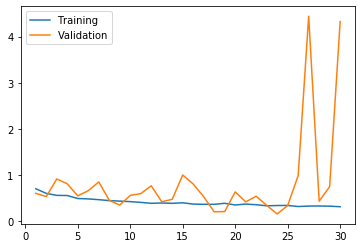

In [37]:
plt.plot(range(1,len(acc)+1), loss, label='Training')
plt.plot(range(1,len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

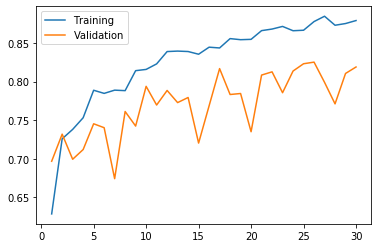

In [38]:
plt.plot(range(1,len(acc)+1), acc, label='Training')
plt.plot(range(1,len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

In [39]:
model.evaluate_generator(test_gen)

[0.8228206634521484, 0.840080976486206]

In [44]:
pred = model.predict_generator(test_input)

In [46]:
pred_class = model.predict_classes(test_img/255)

In [63]:
test['emergency_or_not'] = pred_class

In [66]:
test.sort_index(inplace=True)

In [69]:
test.set_index('image_names').to_csv('/Users/skylark/Desktop/cv/result.csv')

### VGG 16

In [70]:
from keras.applications import VGG16

In [71]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [72]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [73]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [87]:
model2 = models.Sequential()

In [90]:
model2.add(conv_base)

In [91]:
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [92]:
model2.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [81]:
history = model2.fit_generator(train_gen, steps_per_epoch=100, epochs=30, validation_data=validation_gen, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 405s 4s/step - loss: 0.4647 - acc: 0.7720 - val_loss: 0.5377 - val_acc: 0.8237
Epoch 2/30
100/100 [==============================] - 1088s 11s/step - loss: 0.3143 - acc: 0.8623 - val_loss: 0.3252 - val_acc: 0.8356
Epoch 3/30
100/100 [==============================] - 462s 5s/step - loss: 0.2525 - acc: 0.8975 - val_loss: 0.1974 - val_acc: 0.8775
Epoch 4/30
100/100 [==============================] - 455s 5s/step - loss: 0.2191 - acc: 0.9149 - val_loss: 0.1693 - val_acc: 0.8754
Epoch 5/30
100/100 [==============================] - 409s 4s/step - loss: 0.1888 - acc: 0.9225 - val_loss: 0.2442 - val_acc: 0.8938
Epoch 6/30
100/100 [==============================] - 564s 6s/step - loss: 0.1853 - acc: 0.9276 - val_loss: 0.1979 - val_acc: 0.8733
Epoch 7/30
100/100 [==============================] - 436s 4s/step - loss: 0.1585 - acc: 0.9422 - val_loss: 0.2234 - val_acc: 0.9089
Epoch 8/30
100/100 [==============================] - 425s 4s/step 

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

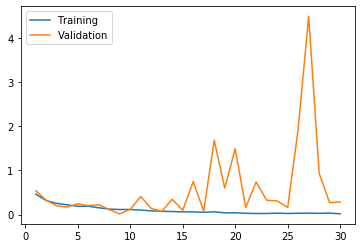

In [83]:
plt.plot(range(1,len(acc)+1), loss, label='Training')
plt.plot(range(1,len(acc)+1), val_loss, label='Validation')
plt.legend()
plt.show()

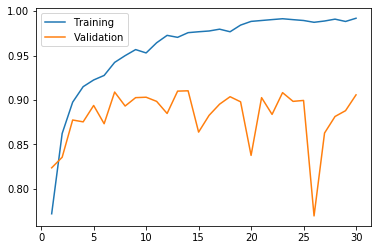

In [84]:
plt.plot(range(1,len(acc)+1), acc, label='Training')
plt.plot(range(1,len(acc)+1), val_acc, label='Validation')
plt.legend()
plt.show()

In [93]:
model2.fit_generator(train_gen, steps_per_epoch=100, epochs=7, validation_data=validation_gen, validation_steps=50)

Epoch 1/7
100/100 [==============================] - 554s 6s/step - loss: 0.1281 - acc: 0.9500 - val_loss: 0.0463 - val_acc: 0.9124
Epoch 2/7
100/100 [==============================] - 561s 6s/step - loss: 0.0630 - acc: 0.9787 - val_loss: 0.4548 - val_acc: 0.8932
Epoch 3/7
100/100 [==============================] - 563s 6s/step - loss: 0.0432 - acc: 0.9833 - val_loss: 0.0617 - val_acc: 0.9110
Epoch 4/7
100/100 [==============================] - 609s 6s/step - loss: 0.0278 - acc: 0.9898 - val_loss: 0.0313 - val_acc: 0.9131
Epoch 5/7
100/100 [==============================] - 576s 6s/step - loss: 0.0264 - acc: 0.9909 - val_loss: 0.5688 - val_acc: 0.8423
Epoch 6/7
100/100 [==============================] - 452s 5s/step - loss: 0.0261 - acc: 0.9913 - val_loss: 0.0900 - val_acc: 0.9120
Epoch 7/7
100/100 [==============================] - 502s 5s/step - loss: 0.0359 - acc: 0.9899 - val_loss: 0.0257 - val_acc: 0.9173


In [94]:
model2.evaluate_generator(test_gen)

[0.553673267364502, 0.8967611193656921]

In [95]:
pred = model2.predict_generator(test_input)

In [96]:
pred_class = model2.predict_classes(test_img/255)

In [102]:
test['img'] = pd.to_numeric(test.image_names.apply(lambda x: x.split('.')[0]))

In [103]:
test.sort_values('img', inplace=True)

In [105]:
test.drop('img', axis=1, inplace=True)

In [108]:
test['emergency_or_not'] = pred_class

In [113]:
test.sort_index().set_index('image_names').to_csv('/Users/skylark/Desktop/cv/result2.csv')